In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
masterlist1=[['100', 100.0e6, 2.7e9, -5.0],['500', 500.0e6, 2.7e9, -5.0],['1000', 1000.0e6, 2.7e9, -5.0],
['1100', 1100.0e6, 2.7e9, -5.0],['1200', 1200.0e6, 2.7e9, -5.0],['1300', 1300.0e6, 2.7e9, -5.0],
['1350', 1350.0e6, 2.7e9, -5.0],['1400', 1400.0e6, 2.7e9, -5.0],['1500', 1500.0e6, 2.7e9, -5.0],
['1600', 1600.0e6, 2.7e9, -5.0]]

In [6]:
def call_behemoth(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../New Signal/" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdza=np.sqrt(fdz)
    fdzaa=output.var()
    input_power=10**dbm
    return (nuM/1e6), (nuM/nuX-1), (dnu/1e6)/int(freq), int(freq), fdzaa/input_power

def call_behemoth2(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../New Signal/Signal Test/" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdza=np.sqrt(fdz)
    fdzaa=output.var()
    input_power=10**dbm
    return (nuM/1e6), (nuM/nuX-1), (dnu/1e6)/int(freq), int(freq), fdzaa/input_power

In [7]:
frequencies=[]
freqratio=[]
freqerror=[]
power=[]
for i,j,k,m in masterlist1:
    outputs=call_behemoth(i,j,k,m)
    frequencies.append(outputs[3])
    freqratio.append(outputs[1])
    freqerror.append(outputs[2])
    power.append(outputs[4])

In [8]:
frequencies2=[]
freqratio2=[]
freqerror2=[]
power2=[]
for i,j,k,m in masterlist1:
    outputs=call_behemoth2(i,j,k,m)
    frequencies2.append(outputs[3])
    freqratio2.append(outputs[1])
    freqerror2.append(outputs[2])
    power2.append(outputs[4])

<Container object of 3 artists>

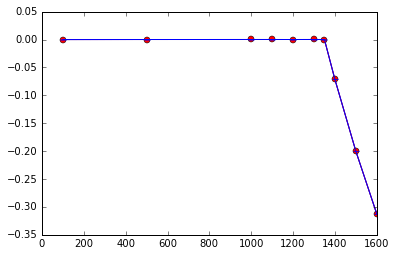

In [9]:
plot(frequencies, freqratio)
plot(frequencies2, freqratio2, 'ro-')
#ylim(-0.1, 0.1)
errorbar(frequencies,freqratio,fmt='b-',yerr=freqerror)

In [10]:
def call_low(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../New Signal/L" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdzaa=output.var()
    input_power=10**dbm
    return fdzaa/input_power

def call_low2(freq, nuX, dt, dbm):
    nu1=80.0e6
    nu2=1700.0e6
    output = np.fromfile("../../New Signal/L" + freq + "MHz_5.0dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdzaa=output.var()
    input_power=10**dbm
    return fdzaa/input_power

In [11]:
lowpower=[]
for i,j,k,m in masterlist1:
    output=call_low(i,j,k,m)
    lowpower.append(output)

In [12]:
lowpower2=[]
for i,j,k,m in masterlist1:
    output=call_low(i,j,k,m)
    lowpower2.append(output)

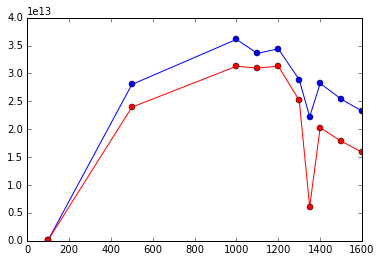

In [13]:
f2=np.array(frequencies)**1
plot(frequencies, power*f2,'bo-')
plot(frequencies, lowpower*f2,'ro-')

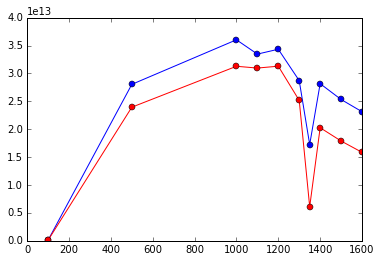

In [14]:
f3=np.array(frequencies2)**1
plot(frequencies2, power2*f2,'bo-')
plot(frequencies2, lowpower2*f2,'ro-')

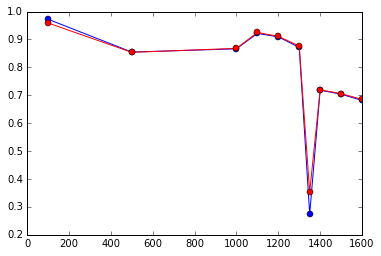

In [15]:
plot (frequencies,np.array(lowpower)/np.array(power),'bo-')
plot (frequencies,np.array(lowpower2)/np.array(power2),'ro-')

In [210]:
amplmaster=['-30.0','-25.0','-20.0','-15.0','-10.0','-5.0','0.0','5.0','10.0','15.0','19.0']

In [211]:
def call_amplitudes(dBm,prefix):
    nu1=80.0e6
    nu2=1700.0e6
    freq=1000
    nuX=1000e6
    dt=2.7e9
    output = np.fromfile("../../"+prefix + "_" +dBm + "dBm.bin", 'u2')
    output=output*1.0-output.mean()
    fd=fft.rfft(output)
    dnu=1.0/((1/dt)*len(output))
    i1=int(nu1/dnu)
    i2=int(nu2/dnu)
    far=arange(i1,i2)*dnu
    fdz=fd[i1:i2]
    fdz=abs(fdz*fdz)
    nuM=far[fdz.argmax()]
    fdza=np.sqrt(fdz)
    variance=output.var()
    fftpower=fdz.max()
    input_power=10**float(dBm)
    return float(dBm), nuM,fftpower,variance

In [212]:
def processAmplitudes(directory):
    res=np.array([call_amplitudes(x,directory) for x in amplmaster])
    newampl=res[:,0]
    nufreq=res[:,1]
    fftpower=res[:,2]
    variance=res[:,3]
    return newampl,nufreq,fftpower,variance
newampl,nufreq,fftpower,variance=processAmplitudes("Amplitudes/1000MHz")

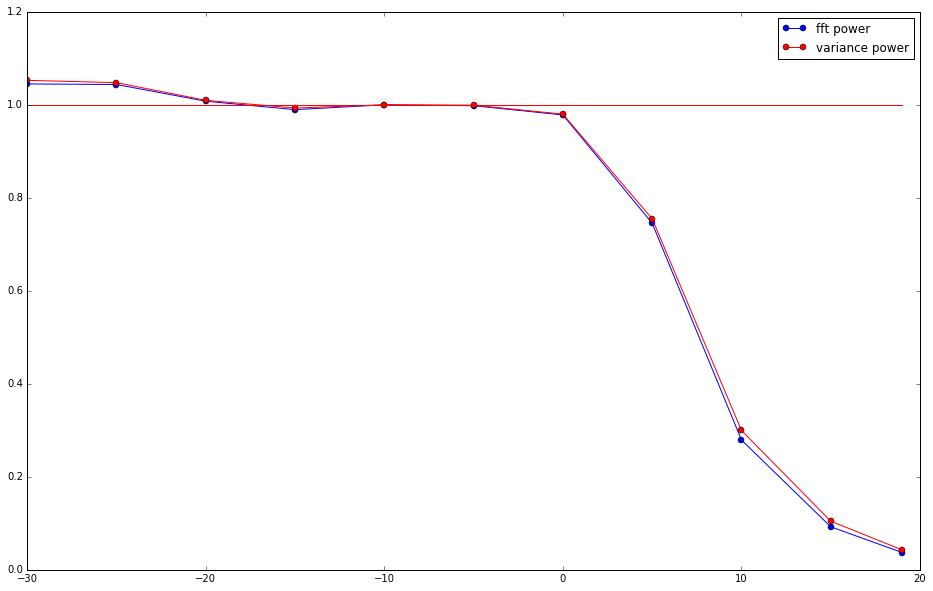

In [213]:
figure(figsize=(16,10))
predpower=10**(newampl/10)
rat1=fftpower/predpower
rat1/=rat1[4]
rat2=variance/predpower
rat2/=rat2[4]
plot(newampl,rat1,'bo-',label='fft power')
plot(newampl,rat2,'ro-',label='variance power')
plot(newampl,np.ones(len(newampl)),'r-')
legend()
#semilogy()

In [214]:
res2=np.array([call_amplitudes2(x) for x in amplmaster])
newampl2=res2[:,0]
nufreq2=res2[:,1]
fftpower2=res2[:,2]
variance2=res2[:,3]
newampl2,nufreq2,fftpower2,variance2=processAmplitudes("New Amplitudes/1000MHz")

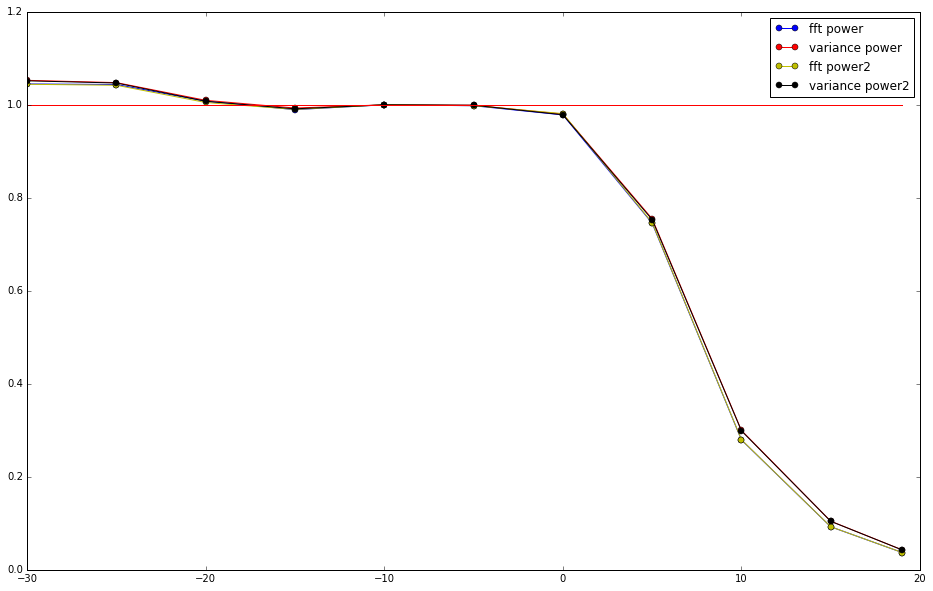

In [215]:
figure(figsize=(16,10))
predpower2=10**(newampl2/10)
predpower=10**(newampl/10)
rat1=fftpower/predpower
rat1/=rat1[4]
rat2=variance/predpower
rat2/=rat2[4]
rat3=fftpower2/predpower2
rat3/=rat3[4]
rat4=variance2/predpower2
rat4/=rat4[4]
plot(newampl,rat1,'bo-',label='fft power')
plot(newampl,rat2,'ro-',label='variance power')
plot(newampl2,rat3,'yo-',label='fft power2')
plot(newampl2,rat4,'ko-',label='variance power2')
plot(newampl2,np.ones(len(newampl2)),'r-')
legend()

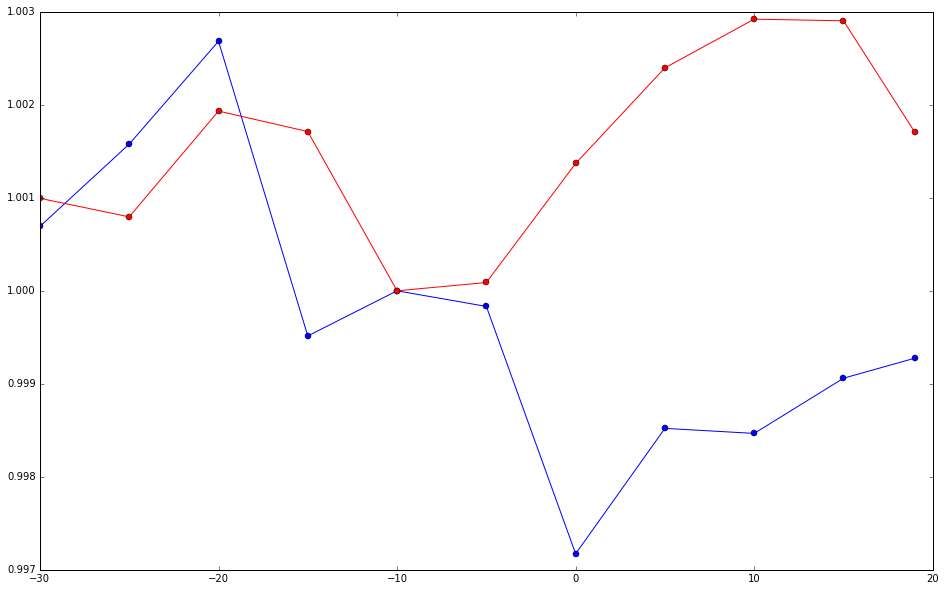

In [216]:
figure(figsize=(16,10))
plot(newampl,rat1/rat3,'bo-',label='fft power difference')
plot(newampl,rat2/rat4,'ro-',label='variance power difference')

In [217]:
newampl,nufreq,fftpower3,variance3=processAmplitudes("500/500MHz")
newampl,nufreq,fftpower4,variance4=processAmplitudes("1200/1200MHz")

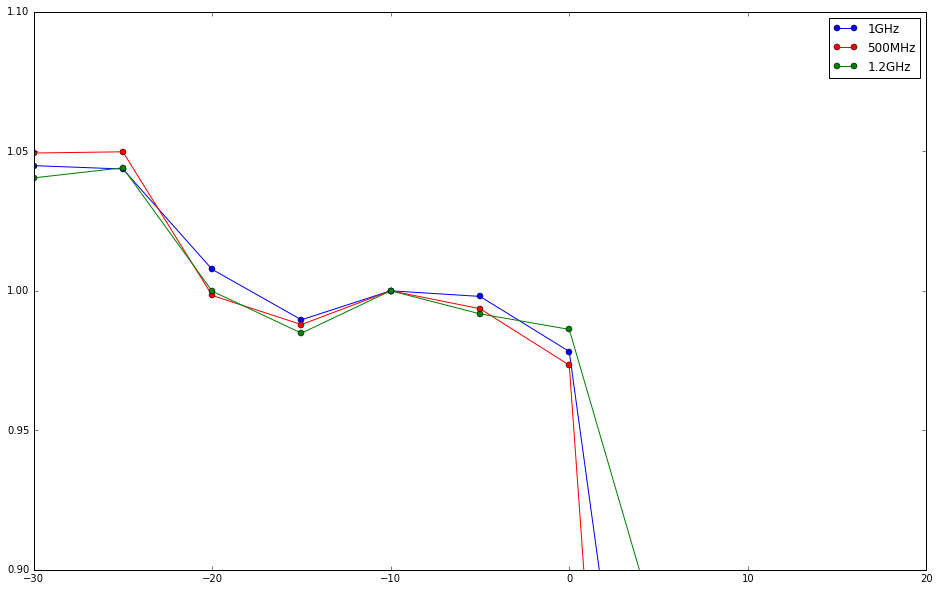

In [222]:
figure(figsize=(16,10))
rat1=fftpower/predpower
rat2=fftpower3/predpower
rat3=fftpower4/predpower
rat1/=rat1[4]
rat2/=rat2[4]
rat3/=rat3[4]

plot(newampl,rat1,'bo-',label='1GHz')
plot(newampl,rat2,'ro-',label='500MHz')
plot(newampl,rat3,'go-',label='1.2GHz')
ylim(0.9,1.1)
legend()

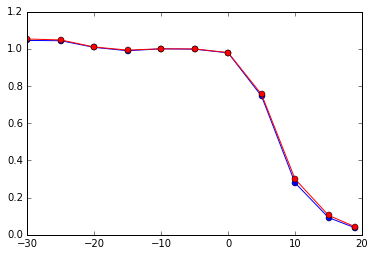

In [207]:
plot(newampl,rat1,'bo-',label='fft power')
plot(newampl,rat2,'ro-',label='variance power')

In [109]:
test=np.fromfile("../../Amplitudes/1000MHz_19.0dBm.bin", 'u2')

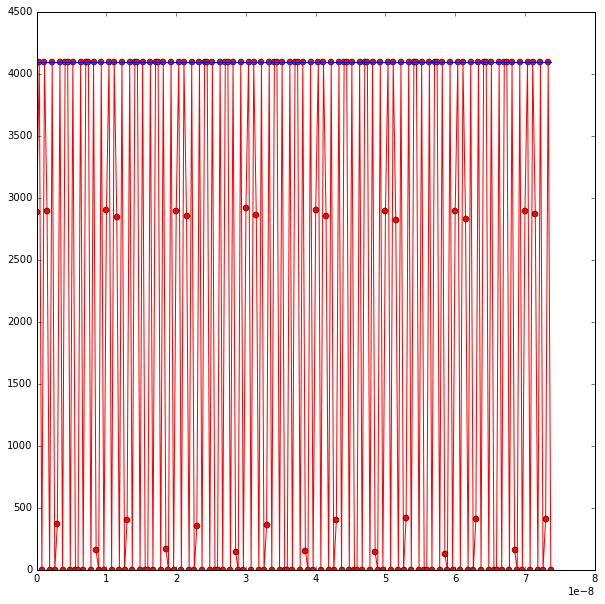

In [111]:
figure(figsize=(10,10))
dt=1/2.7e9
N=200
t=arange(N)*dt
plot (t,test[:N],'ro-')
plot (t,4096*np.ones(N))